Assignment 3

Language Used: Python (version 9.3.4)

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
page1 = pd.read_csv('home_page_table.csv')
page1

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page
...,...,...
90395,456851,home_page
90396,128619,home_page
90397,167290,home_page
90398,437765,home_page


In [3]:
page2 = pd.read_csv('search_page_table.csv')
page2

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page
...,...,...
45195,417880,search_page
45196,989982,search_page
45197,428806,search_page
45198,609493,search_page


In [4]:
page3 = pd.read_csv('payment_page_table.csv')
page3

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page
...,...,...
6025,23639,payment_page
6026,659242,payment_page
6027,395342,payment_page
6028,637777,payment_page


In [5]:
page4 = pd.read_csv('payment_confirmation_table.csv')
page4

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page
...,...,...
447,397473,payment_confirmation_page
448,860829,payment_confirmation_page
449,371291,payment_confirmation_page
450,263707,payment_confirmation_page


In [6]:
users = pd.read_csv('user_table.csv')
users

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male
...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female
90396,642989,2015-02-08,Desktop,Female
90397,659645,2015-04-13,Desktop,Male
90398,359779,2015-03-23,Desktop,Male


In [7]:
# combined data and group-by based on user id
df = page1.append(page2.append(page3.append(page4)))
df

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page
...,...,...
447,397473,payment_confirmation_page
448,860829,payment_confirmation_page
449,371291,payment_confirmation_page
450,263707,payment_confirmation_page


In [8]:
df.groupby('page').count()

,user_id
page,
home_page,90400
payment_confirmation_page,452
payment_page,6030
search_page,45200


[Text(0, 0, '90400 (63.63%)'),
 Text(0, 0, '45200 (31.81%)'),
 Text(0, 0, '6030 (4.24%)'),
 Text(0, 0, '452 (0.32%)')]

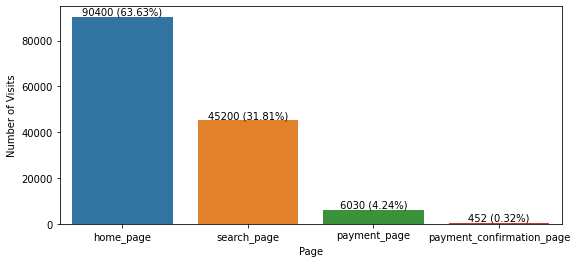

In [9]:
#analysis of visits per page
plt.figure(figsize=(9,4))
a1 = sb.countplot(x=df['page'], order=df['page'].value_counts(ascending=False).index)
a1.set(xlabel='Page', ylabel='Number of Visits')

visitCount = df['page'].value_counts(ascending=False).values
visitPercent = df['page'].value_counts(ascending=False, normalize=True).values*100
countLabels = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(visitCount, visitPercent)]
a1.bar_label(container=a1.containers[0], labels=countLabels)

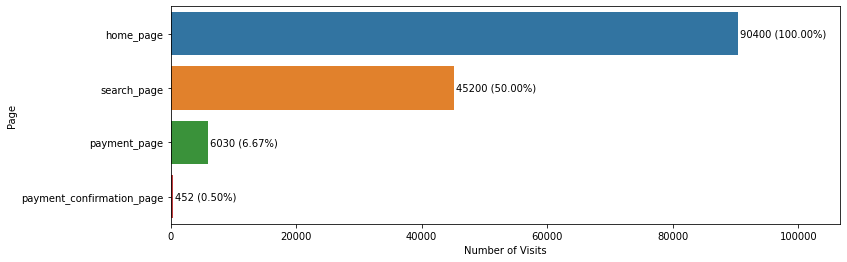

In [10]:
#analysis of how far a user accesses the site
plt.figure(figsize=(12,4))
a1 = sb.countplot(y=df['page'], order=df['page'].value_counts(ascending=False).index)
a1.set(xlabel='Number of Visits', ylabel='Page')

visitCount = df['page'].value_counts(ascending=False).values
visitPercent = (df['page'].value_counts(ascending=False).values/df.groupby('page')['page'].count()[0])*100
countLabels = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(visitCount, visitPercent)]
a1.bar_label(container=a1.containers[0], labels=countLabels, label_type='edge',padding=2)
a1.margins(x=0.18)

In [11]:
# get last page visited by each user
users = users.assign(page4=users.user_id.isin(page4.user_id))
users = users.assign(page3=users.user_id.isin(page3.user_id))
users = users.assign(page2=users.user_id.isin(page2.user_id))
users = users.assign(page1=users.user_id.isin(page1.user_id))

def getLastPage(row):
    if row.page4:
        return "payment_confirmation_page"
    elif row.page3:
        return "payment_page"
    elif row.page2:
        return "search_page"
    elif row.page1:
        return "home_page"
users = users.assign(last_page=users.apply(getLastPage, axis=1))

users = users.drop(['page4', 'page3','page2','page1'], axis = 1)

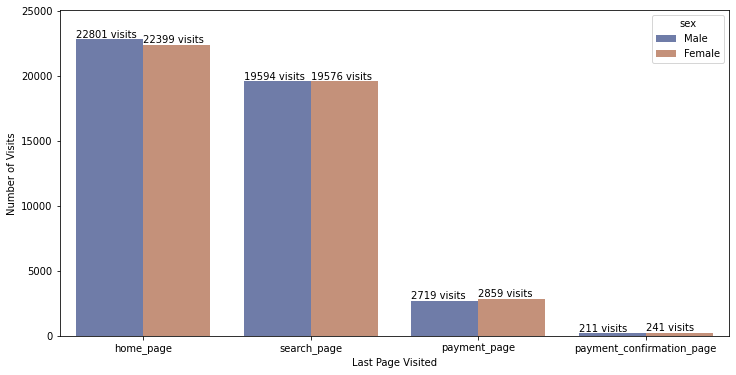

In [12]:
# visits per page by user based on gender
plt.figure(figsize=(12,6))
a2 = sb.countplot(x=users['last_page'], hue=users['sex'], order=users['last_page'].value_counts(ascending=False).index,
                 hue_order= users['sex'].value_counts().index, palette="dark", alpha=0.6)
a2.set(xlabel='Last Page Visited', ylabel='Number of Visits')

for p in a2.patches:
    txt = str(p.get_height())+" visits"
    txt_x = p.get_x()
    txt_y = p.get_height()
    a2.text(txt_x,txt_y,txt,va='bottom')
a2.margins(y=0.1)

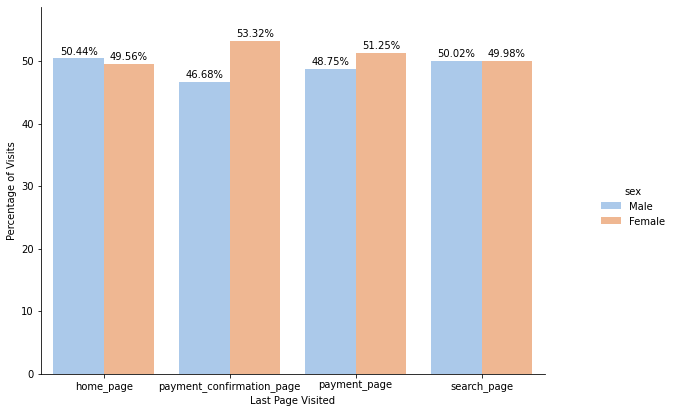

In [13]:
df2 = users.copy()
df2 = df2.groupby('last_page')['sex'].value_counts(normalize=True).mul(100)
df2 = df2.rename('percent').reset_index()

a2 = sb.catplot(x='last_page', y='percent', hue='sex', kind='bar', data= df2, palette='pastel')
a2.fig.set_size_inches(10, 6)
a2.set(xlabel="Last Page Visited", ylabel="Percentage of Visits")

ax = a2.facet_axis(0,0)
for c in ax.containers:
    percentLabels = [f'{p.get_height().round(2)}%' for p in c]
    ax.bar_label(container=c, labels=percentLabels, label_type='edge',padding=2)
ax.margins(y=0.1)

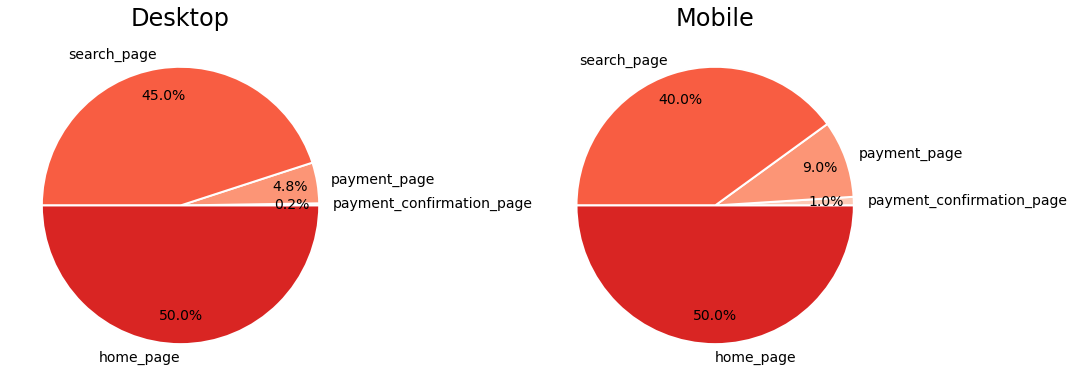

In [14]:
# see contrast in pages visited based on device
df3 = users.copy()
df3 = df3.groupby('device')['last_page'].value_counts(ascending=True)
df3 = df3.rename('count').reset_index()
df3

colors = plt.get_cmap('Reds')(np.linspace(0.2, 0.7, 4))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
df3_1 = df3.copy()
df3_1 = df3[df3['device']=="Desktop"]
ax1.pie(x=df3_1['count'], labels=df3_1['last_page'],autopct = '%1.1f%%',pctdistance=0.8, textprops={'fontsize': 14},wedgeprops={"linewidth": 2, "edgecolor": "white"},colors=colors)
ax1.set_title('Desktop',fontsize=24)

df3_2= df3.copy()
df3_2 = df3[df3['device']=="Mobile"]
ax2.pie(x=df3_2['count'], labels=df3_2['last_page'],autopct = '%1.1f%%',pctdistance=0.8, textprops={'fontsize': 14},wedgeprops={"linewidth": 2, "edgecolor": "white"},colors=colors)
ax2.set_title('Mobile',fontsize=24)

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='Visit Date', ylabel='Number of Visits'>

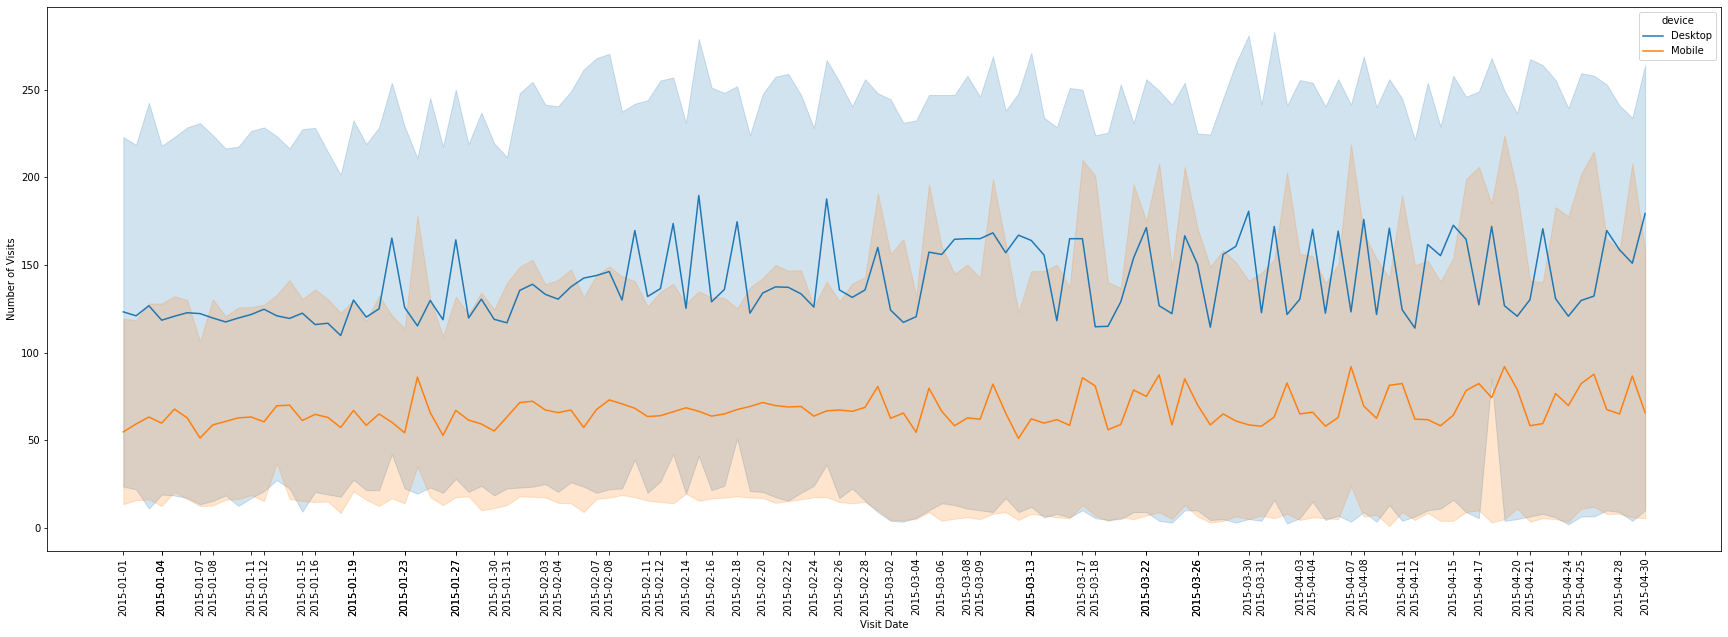

In [15]:
# fluctuation in page visits every fortnight, based on device
df4 = users.copy()
df4 = df4.groupby(['device','date'])['last_page'].value_counts(ascending=False)
df4 = df4.rename('date_visit').reset_index()

plt.figure(figsize=(30,10))
a3 = sb.lineplot(x='date', y='date_visit', hue='device',data = df4)
a3.set(xlabel="Visit Date", ylabel="Number of Visits")
plt.xticks(df4['date'][::15], rotation=90)
fig.tight_layout()
a3

<AxesSubplot:xlabel='Month', ylabel='Number of Visits'>

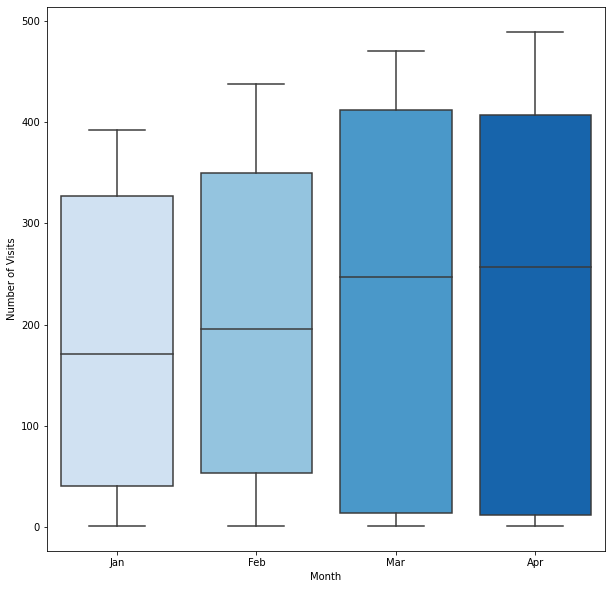

In [16]:
# month over month comparison on number of visits monthly
df5 = users.copy()
df5['year'] = pd.to_datetime(df5['date']).dt.year
df5['month'] = pd.to_datetime(df5['date']).dt.month_name().str[:3]

df5 = df5.groupby(['month','date'])['last_page'].value_counts(ascending=False)
df5 = df5.rename('date_visit').reset_index()
# df5 = df5.drop('last_page',axis=1)

plt.figure(figsize=(10,10))
month_order = [0,3,1,2]
order = [df5.month.value_counts(ascending=False).index[i] for i in month_order]
a4 = sb.boxplot(x='month',y='date_visit',order=order,palette='Blues',
                saturation=1,linewidth=1.5,data=df5)
a4.set(xlabel="Month", ylabel="Number of Visits")
a4